### Binary Classification using Deep Neural Networks

#### (Classify movie reviews into 'positive' & 'negative')

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
max_words = 10000 # Consider only the top 10,000 most frequent words
max_len = 200 # Limit review length to 200 words

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [5]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128), # Embedding layer for word representation
    GlobalAveragePooling1D(), # Global average pooling layer to reduce dimensions
    Dense(64, activation='relu'), # Fully connected layer
    Dense(1, activation='sigmoid') # Output layer (binary classification)
])

In [6]:
model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6773 - loss: 0.5804 - val_accuracy: 0.8583 - val_loss: 0.3261
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8952 - loss: 0.2619 - val_accuracy: 0.8394 - val_loss: 0.3521
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9188 - loss: 0.2027 - val_accuracy: 0.8640 - val_loss: 0.3153
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9330 - loss: 0.1788 - val_accuracy: 0.8663 - val_loss: 0.3352
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9502 - loss: 0.1435 - val_accuracy: 0.8673 - val_loss: 0.3381


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8699 - loss: 0.3336
Test Accuracy: 86.73


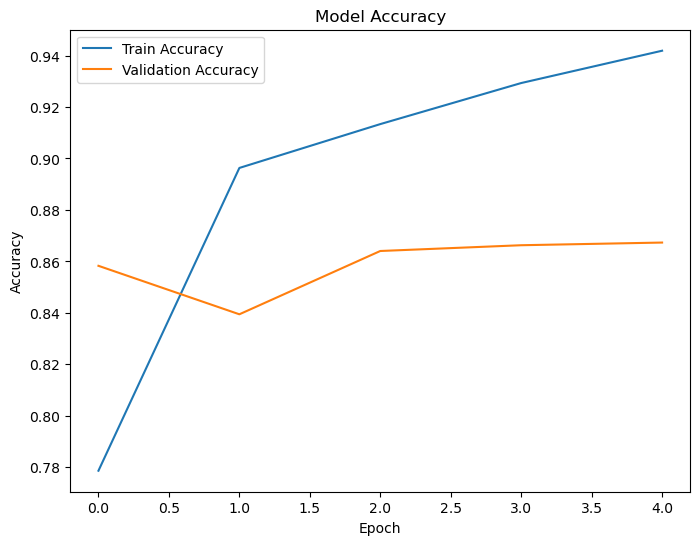

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()